# Common NGS data formats and tools

## Data formats

- fasta
- fastq
- bam / bam.bai / sam
- bed / bed4 / bed6 / bed6+4 == narrowPeak / bed12
- wiggle / bedgraph / bigwiggle
- vcf
- gtf / gff / gff3
- tsv / csv
- .py / .R / .sh / .jar / .pl

## Tools

- fastqc / fastp
- seqtk
- BWA / bowtie2 / STAR
- samtools 
- bedtools
- deeptools
- scripting languange: Python



## FASTA format

An example shown below.

```
;LCBO - Prolactin precursor - Bovine
; a sample sequence in FASTA format
; MDSKGSSQKGSRLLLLLVVSNLLLCQGVVSTPVCPNGPGNCQVSLRDLFDRAVMVSHYIHDLSS
EMFNEFDKRYAQGKGFITMALNSCHTSSLPTPEDKEQAQQTHHEVLMSLILGLLRSWNDPLYHL
VTEVRGMKGAPDAILSRAIEIEEENKRLLEGMEMIFGQVIPGAKETEPYPVWSGLPSLQTKDED
ARYSAFYNLLHCLRRDSSKIDTYLKLLNCRIIYNNNC*

>MCHU - Calmodulin - Human, rabbit, bovine, rat, and chicken
MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTID
FPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREA
DIDGDGQVNYEEFVQMMTAK*

>gi|5524211|gb|AAD44166.1| cytochrome b [Elephas maximus maximus]
LCLYTHIGRNIYYGSYLYSETWNTGIMLLLITMATAFMGYVLPWGQMSFWGATVITNLFSAIPYIGTNLV
EWIWGGFSVDKATLNRFFAFHFILPFTMVALAGVHLTFLHETGSNNPLGLTSDSDKIPFHPYYTIKDFLG
LLILILLLLLLALLSPDMLGDPDNHMPADPLNTPLHIKPEWYFLFAYAILRSVPNKLGGVLALFLSIVIL
GLMPFLHTSKHRSMMLRPLSQALFWTLTMDLLTLTWIGSQPVEYPYTIIGQMASILYFSIILAFLPIAGX
IENY
```

### Syntax

- ";" is for comments
- ">" is for the name of a DNA/RNA/protein sequence
- The sequence name can only be written in one line, no matter how long it is
- The next line following ">" should not be an empty line

```
; invalid FASTA format
>Sequence_1

ACTTGG

; invalid FASTA format
>Sequence_2
>split line for names new sequence in human
ACGTGG
```

### Other notes

#### IUPAC code for DNA letters:


| IUPAC nucleotide code | Base                |   |   |   |
|-----------------------|---------------------|---|---|---|
| A                     | Adenine             |   |   |   |
| C                     | Cytosine            |   |   |   |
| G                     | Guanine             |   |   |   |
| T (or U)              | Thymine (or Uracil) |   |   |   |
| R                     | A or G              |   |   |   |
| Y                     | C or T              |   |   |   |
| S                     | G or C              |   |   |   |
| W                     | A or T              |   |   |   |
| K                     | G or T              |   |   |   |
| M                     | A or C              |   |   |   |
| B                     | C or G or T         |   |   |   |
| D                     | A or G or T         |   |   |   |
| H                     | A or C or T         |   |   |   |
| V                     | A or C or G         |   |   |   |
| N                     | any base            |   |   |   |
| . or -                | gap                 |   |   |   |

#### Filename extension

| Extension    | Meaning                          | Notes                                                                                                   |
|--------------|----------------------------------|---------------------------------------------------------------------------------------------------------|
| fasta, fa | generic FASTA                    | Any generic fasta file. See below for other common FASTA file extensions                                |
| fna          | FASTA nucleic acid               | Used generically to specify nucleic acids.                                                              |
| ffn          | FASTA nucleotide of gene regions | Contains coding regions for a genome.                                                                   |
| faa          | FASTA amino acid                 | Contains amino acid sequences. A multiple protein fasta file can have the more specific extension mpfa. |
| frn          | FASTA non-coding RNA             | Contains non-coding RNA regions for a genome, in DNA alphabet e.g. tRNA, rRNA                           |

### Reference

See [this](https://en.wikipedia.org/wiki/FASTA_format) wiki.

## FASTA examples

### 1. Download human genome sequence from UCSC

```shell
wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz

ls

gunzip hg38.fa.gz

head hg38.fa
```


```
# How many chromosomes do we have?
grep ">" hg38.fa | wc -l
```

### 2. Sequence Retrieval using online tools

This is a common task. For example: given several genes, we want to extract gene promoters, or gene exons. 

The question is simple, however, for many people who have never done it before, what we really need is a list of `genomic coordinates`.




#### Solution 1: Using ProteinPaint (https://proteinpaint.stjude.org/)

Fastest way for a single given genomic coordinate: e.g. `chr11:5248160-5248251` or `chr11	5248160	5248251`

To get the reverse completement, just use some online tool, such as: https://www.bioinformatics.org/sms/rev_comp.html


#### Solution 2: Using Ensembl BioMart (https://www.ensembl.org/biomart/martview/)

Google `ensembl biomart`, click on the first hit.

Convenient way for getting promoter/UTR/exon/intron sequences given a list of gene names/IDs.

**Exercise: get the promoter sequences for these genes**

```
Hbg1
Hbg2
hbb
hba1
```


### 3: Sequence Retrieval using [bedtools](https://bedtools.readthedocs.io/en/latest/)

The ultimate solution.



In [6]:
!bedtools getfasta


Tool:    bedtools getfasta (aka fastaFromBed)
Version: v2.30.0
Summary: Extract DNA sequences from a fasta file based on feature coordinates.

Usage:   bedtools getfasta [OPTIONS] -fi <fasta> -bed <bed/gff/vcf>

Options: 
	-fi		Input FASTA file
	-fo		Output file (opt., default is STDOUT
	-bed		BED/GFF/VCF file of ranges to extract from -fi
	-name		Use the name field and coordinates for the FASTA header
	-name+		(deprecated) Use the name field and coordinates for the FASTA header
	-nameOnly	Use the name field for the FASTA header
	-split		Given BED12 fmt., extract and concatenate the sequences
			from the BED "blocks" (e.g., exons)
	-tab		Write output in TAB delimited format.
	-bedOut		Report extract sequences in a tab-delimited BED format instead of in FASTA format.
			- Default is FASTA format.
	-s		Force strandedness. If the feature occupies the antisense,
			strand, the sequence will be reverse complemented.
			- By default, strand information is ignored.
	-fullHeader	Use full fast

## bed format

We are going to use a bed6 or a standard bed format, which contains 6 columns: chr, start, end, name, value, strand.

In [8]:
!head CTCF.hg38.random.bed

chr6	92372038	92372057	JASPA_MA0139.1_CTCF_chr6_92372039	9.80328	-
chr1	113890670	113890689	JASPA_MA0139.1_CTCF_chr1_113890671	8.7541	-
chr16	12677107	12677126	JASPA_MA0139.1_CTCF_chr16_12677108	13.9836	-
chr11	116687055	116687074	JASPA_MA0139.1_CTCF_chr11_116687056	9.04918	-
chr13	32306850	32306869	JASPA_MA0139.1_CTCF_chr13_32306851	8.11475	+
chr4	55038826	55038845	JASPA_MA0139.1_CTCF_chr4_55038827	8.18033	+
chr4	116198084	116198103	JASPA_MA0139.1_CTCF_chr4_116198085	12.0328	-
chr12	24244394	24244413	JASPA_MA0139.1_CTCF_chr12_24244395	8.44262	-
chr8	47186476	47186495	JASPA_MA0139.1_CTCF_chr8_47186477	8.85246	+
chr4	82671394	82671413	JASPA_MA0139.1_CTCF_chr4_82671395	9.55738	-


#### Other bed formats, [ref](https://bedtools.readthedocs.io/en/latest/content/general-usage.html)
    
BED3: A BED file where each feature is described by chrom, start, and end.

For example: `chr1          11873   14409`

BED4: A BED file where each feature is described by chrom, start, end, and name.

For example: `chr1  11873  14409  uc001aaa.3`

BED5: A BED file where each feature is described by chrom, start, end, name, and score.

For example: `chr1 11873 14409 uc001aaa.3 0`

BED6: A BED file where each feature is described by chrom, start, end, name, score, and strand.

For example: `chr1 11873 14409 uc001aaa.3 0 +`

BED12: A BED file where each feature is described by all twelve columns listed above.

For example: `chr1 11873 14409 uc001aaa.3 0 + 11873 11873 0 3 354,109,1189, 0,739,1347`

#### Standard bedtools getfasta usage

In [12]:
!bedtools getfasta -fi hg38.fa -bed CTCF.hg38.random.bed -fo CTCF.fa ; head CTCF.fa

>chr6:92372038-92372057
TAGCTCCCTCTTCTGAAGC
>chr1:113890670-113890689
TCTTGCCACCCTCTGACCA
>chr16:12677107-12677126
GACTGGCACCTGCTGGGCA
>chr11:116687055-116687074
CACCTCCACCTCTAGGTCT
>chr13:32306850-32306869
aatccaggaggtggagatt


#### strand-specific sequence

In [13]:
!bedtools getfasta -fi hg38.fa -bed CTCF.hg38.random.bed -fo CTCF.fa -s; head CTCF.fa

>chr6:92372038-92372057(-)
GCTTCAGAAGAGGGAGCTA
>chr1:113890670-113890689(-)
TGGTCAGAGGGTGGCAAGA
>chr16:12677107-12677126(-)
TGCCCAGCAGGTGCCAGTC
>chr11:116687055-116687074(-)
AGACCTAGAGGTGGAGGTG
>chr13:32306850-32306869(+)
aatccaggaggtggagatt


#### use the original name as the FASTA header

In [15]:
!bedtools getfasta -fi hg38.fa -bed CTCF.hg38.random.bed -fo CTCF.fa -s -name; head CTCF.fa

>JASPA_MA0139.1_CTCF_chr6_92372039::chr6:92372038-92372057(-)
GCTTCAGAAGAGGGAGCTA
>JASPA_MA0139.1_CTCF_chr1_113890671::chr1:113890670-113890689(-)
TGGTCAGAGGGTGGCAAGA
>JASPA_MA0139.1_CTCF_chr16_12677108::chr16:12677107-12677126(-)
TGCCCAGCAGGTGCCAGTC
>JASPA_MA0139.1_CTCF_chr11_116687056::chr11:116687055-116687074(-)
AGACCTAGAGGTGGAGGTG
>JASPA_MA0139.1_CTCF_chr13_32306851::chr13:32306850-32306869(+)
aatccaggaggtggagatt


#### In new bedtools version, -name adds the coordinates, we need to use -nameOnly to just use the original name

In [17]:
!bedtools getfasta -fi hg38.fa -bed CTCF.hg38.random.bed -fo CTCF.fa -s -nameOnly; head CTCF.fa

>JASPA_MA0139.1_CTCF_chr6_92372039(-)
GCTTCAGAAGAGGGAGCTA
>JASPA_MA0139.1_CTCF_chr1_113890671(-)
TGGTCAGAGGGTGGCAAGA
>JASPA_MA0139.1_CTCF_chr16_12677108(-)
TGCCCAGCAGGTGCCAGTC
>JASPA_MA0139.1_CTCF_chr11_116687056(-)
AGACCTAGAGGTGGAGGTG
>JASPA_MA0139.1_CTCF_chr13_32306851(+)
aatccaggaggtggagatt


#### TSV output

In [19]:
!bedtools getfasta -fi hg38.fa -bed CTCF.hg38.random.bed -fo CTCF.fa -s -nameOnly -tab; head CTCF.fa

JASPA_MA0139.1_CTCF_chr6_92372039(-)	GCTTCAGAAGAGGGAGCTA
JASPA_MA0139.1_CTCF_chr1_113890671(-)	TGGTCAGAGGGTGGCAAGA
JASPA_MA0139.1_CTCF_chr16_12677108(-)	TGCCCAGCAGGTGCCAGTC
JASPA_MA0139.1_CTCF_chr11_116687056(-)	AGACCTAGAGGTGGAGGTG
JASPA_MA0139.1_CTCF_chr13_32306851(+)	aatccaggaggtggagatt
JASPA_MA0139.1_CTCF_chr4_55038827(+)	aagtcagcaggtgccacaa
JASPA_MA0139.1_CTCF_chr4_116198085(-)	ctgccacaagaggatacaa
JASPA_MA0139.1_CTCF_chr12_24244395(-)	CAGTCAGTAGGAGGGGCTG
JASPA_MA0139.1_CTCF_chr8_47186477(+)	taatcaccagtggtcagta
JASPA_MA0139.1_CTCF_chr4_82671395(-)	tagcctgtagatgtcaatt



### 4: Sequence Retrieval using Python

The ultimate solution for more customized analyses.


#### PyRanges

In [56]:
import pyranges as pr
import pandas as pd

In [57]:
ctcf = pr.read_bed("CTCF.hg38.random.bed",as_df=False).sort() # sort will increase downstream analysis speed
ctcf.head()

,Chromosome,Start,End,Name,Score,Strand
0,chr1,11804507,11804526,JASPA_MA0139.1_CTCF_chr1_11804508,13.27870,+
1,chr1,29824616,29824635,JASPA_MA0139.1_CTCF_chr1_29824617,9.62295,+
2,chr1,23368354,23368373,JASPA_MA0139.1_CTCF_chr1_23368355,15.57380,-
3,chr1,29744978,29744997,JASPA_MA0139.1_CTCF_chr1_29744979,8.57377,-
4,chr1,113890670,113890689,JASPA_MA0139.1_CTCF_chr1_113890671,8.75410,-
5,chr1,116134359,116134378,JASPA_MA0139.1_CTCF_chr1_116134360,11.63930,-
6,chr1,153684245,153684264,JASPA_MA0139.1_CTCF_chr1_153684246,8.45902,-
7,chr1,223429627,223429646,JASPA_MA0139.1_CTCF_chr1_223429628,10.93440,-


In [58]:
type(ctcf)

pyranges.pyranges.PyRanges

In [59]:
ctcf.seq = pr.get_fasta(ctcf.unstrand(), "hg38.fa")

In [60]:
ctcf.head()

,Chromosome,Start,End,Name,Score,Strand,seq
0,chr1,11804507,11804526,JASPA_MA0139.1_CTCF_chr1_11804508,13.27870,+,AGGCCAACAGAGGGCATAG
1,chr1,29824616,29824635,JASPA_MA0139.1_CTCF_chr1_29824617,9.62295,+,AGATCAGCAGAGGGCCCCT
2,chr1,23368354,23368373,JASPA_MA0139.1_CTCF_chr1_23368355,15.57380,-,CTCTGCCATCTCGAGGCCG
3,chr1,29744978,29744997,JASPA_MA0139.1_CTCF_chr1_29744979,8.57377,-,ccctgacctctgtaggtcc
4,chr1,113890670,113890689,JASPA_MA0139.1_CTCF_chr1_113890671,8.75410,-,TCTTGCCACCCTCTGACCA
5,chr1,116134359,116134378,JASPA_MA0139.1_CTCF_chr1_116134360,11.63930,-,GGATGCCACCTAATGGTGG
6,chr1,153684245,153684264,JASPA_MA0139.1_CTCF_chr1_153684246,8.45902,-,TCCTGCCGTCCAGTGGAGG
7,chr1,223429627,223429646,JASPA_MA0139.1_CTCF_chr1_223429628,10.93440,-,GCTTGCCCTCTGCAGCCCA


Pyrange only works for unstranded dataframe

In [61]:
def revcomp(seq):
    tab = str.maketrans("ACTG", "TGAC")
    return seq.translate(tab)[::-1]
ctcf.seq = ctcf.as_df().apply(lambda r: revcomp(r['seq']) if r['Strand']=="-" else r['seq'],axis=1)

In [66]:
ctcf.head()

,Chromosome,Start,End,Name,Score,Strand,seq
0,chr1,11804507,11804526,JASPA_MA0139.1_CTCF_chr1_11804508,13.27870,+,AGGCCAACAGAGGGCATAG
1,chr1,29824616,29824635,JASPA_MA0139.1_CTCF_chr1_29824617,9.62295,+,AGATCAGCAGAGGGCCCCT
2,chr1,23368354,23368373,JASPA_MA0139.1_CTCF_chr1_23368355,15.57380,-,CGGCCTCGAGATGGCAGAG
3,chr1,29744978,29744997,JASPA_MA0139.1_CTCF_chr1_29744979,8.57377,-,cctggatgtctccagtccc
4,chr1,113890670,113890689,JASPA_MA0139.1_CTCF_chr1_113890671,8.75410,-,TGGTCAGAGGGTGGCAAGA
5,chr1,116134359,116134378,JASPA_MA0139.1_CTCF_chr1_116134360,11.63930,-,CCACCATTAGGTGGCATCC
6,chr1,153684245,153684264,JASPA_MA0139.1_CTCF_chr1_153684246,8.45902,-,CCTCCACTGGACGGCAGGA
7,chr1,223429627,223429646,JASPA_MA0139.1_CTCF_chr1_223429628,10.93440,-,TGGGCTGCAGAGGGCAAGC


#### Look at sequence logo

In [77]:
from Bio import motifs
from Bio.Seq import Seq

In [82]:
m = motifs.create([Seq(x.upper()) for x in ctcf.seq.tolist()])

In [84]:
m.weblogo("CTCF.png")

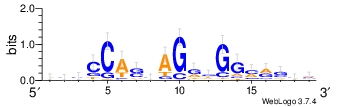

In [86]:
from IPython.display import Image
Image("CTCF.png")

#### Manhattan plot

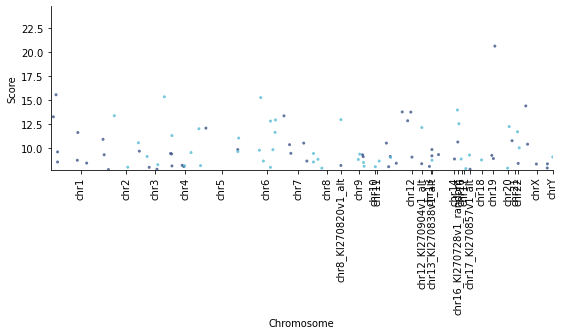

<AxesSubplot:xlabel='Chromosome', ylabel='Score'>

In [108]:
from qmplot import manhattanplot
# https://github.com/ShujiaHuang/qmplot
manhattanplot(data=ctcf.as_df(),
              chrom="Chromosome",
              pos="Start",
              pv="Score",
              snp="Name",
              logp=False,
              ylabel="Score",
              xlabel="Chromosome",
               xticklabel_kws={"rotation": "vertical"},
               is_show=True,  # display the plot in screen
               figname="output_manhattan_plot.png")

## FASTQ format


In [110]:
!zcat test.10K.R1.fastq.gz | head

@M04990:66:000000000-G83PY:1:2101:2222:14575 1:N:0:TCTTCCTTTCCTTTTTTTGTTTTTCCTTCTTTCTCTTTCTTTTTTTTTGTTTTTTTTATTTGGTTTTTTTTTTTTTTTTCCTCTTGCATCTGTTGTTCT+TCTTTCCC
GCTCGACGCCATTAATAATGTTTTCCGTAAATTCAGCGCCTTCCATGATG
+
CCCDDDDCCCCCGGGGGGGGGGHHHHGHHGHHHHHHHGGGGGHHHHHHHH
@M04990:66:000000000-G83PY:1:1102:10573:9495 1:N:0:TCGTCCTCTCCTTGTGCCTGTTTCAATGCGTCCTCGCTCGCACTCACTTTTATCGAAGTGACTCGTTCGCCGTTGTGACACCTCGTCCACGCCAATTAT+TATCCTCT
CAATAGTCGTACGCCGATGCGAAACATCGGCCACGTGTGTCGATCTCGTA
+
CCCCBFFFCBFCGGGGFGGGGGGGGHHHGGGGGGGHHHHHHGHGFHGHGG
@M04990:66:000000000-G83PY:1:1102:15470:5522 1:N:0:CCCCGCCACCGTGGGGCGGGGTGGAAGCATGCGCCGCCCCCCGCCGGGCGGGGCGATGTTTTGTGGTAGCCGCGGCGCAAACACCCCCCCCACTAACCC+AGAGTAGA
CATTGGCACAGCTTGTCTCCAGGACCTTTTATTTTAGAACAAAAAAAAAA

gzip: stdout: Broken pipe



### Syntax:

- Each sequence/read is represented in 4 lines
- first line is read name, followed by some descriptions
- second line is the sequence
- third line is just +
- fourth line is the quality scores, same length as the sequence

### Base qualities, increasing order:
```
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~
```

## FASTQ examples

### 1. take a look at the fastq files

Usually I just use `less`.

### 2. check sequencing quality

Use `fastqc`

In [112]:
!mkdir test_fastqc
!module load fastqc; fastqc test.10K.R1.fastq.gz -o test_fastqc

Started analysis of test.10K.R1.fastq.gz
Approx 10% complete for test.10K.R1.fastq.gz
Approx 20% complete for test.10K.R1.fastq.gz
Approx 30% complete for test.10K.R1.fastq.gz
Approx 40% complete for test.10K.R1.fastq.gz
Approx 50% complete for test.10K.R1.fastq.gz
Approx 60% complete for test.10K.R1.fastq.gz
Approx 70% complete for test.10K.R1.fastq.gz
Approx 80% complete for test.10K.R1.fastq.gz
Approx 90% complete for test.10K.R1.fastq.gz
Approx 100% complete for test.10K.R1.fastq.gz
Analysis complete for test.10K.R1.fastq.gz


Also see: https://hemtools.readthedocs.io/en/latest/content/Bioinformatics_tools/fastqc.html for batch run

### 3. read alignment using BWA


In [116]:
!module load bwa;\
bwa_index=/home/yli11/Data/Human/hg38/bwa_16a_index/hg38.fa;\
bwa mem $bwa_index test.10K.R1.fastq.gz test.10K.R2.fastq.gz > test.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 20000 sequences (1000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 2289, 1, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (62, 168, 228)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 560)
[M::mem_pestat] mean and std.dev: (162.87, 115.26)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 726)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 20000 reads in 2.793 CPU sec, 2.793 real sec
[main] Version: 0.7.12-r1039
[main] CMD: bwa mem /home/yli11/Data/Human/hg38/bwa_16a_index/hg38.fa test.10K.R1.fastq.gz test.10K.R2.fastq.gz
[main] Real time: 22.389 sec; CPU: 4.152 sec


**IMPORTANT**

Notice that the bwa version is `0.7.12-r1039`, but my index was created by `0.7.16a`, so the aligned results may have some error. Better to use the same bwa version.

In [118]:
!module load samtools/1.7;\
samtools view test.sam | head

M04990:66:000000000-G83PY:1:2101:2222:14575	77	*	0	0	*	*	0	0	GCTCGACGCCATTAATAATGTTTTCCGTAAATTCAGCGCCTTCCATGATG	CCCDDDDCCCCCGGGGGGGGGGHHHHGHHGHHHHHHHGGGGGHHHHHHHH	AS:i:0	XS:i:0
M04990:66:000000000-G83PY:1:2101:2222:14575	141	*	0	0	*	*	0	0	ATCATGAGTCAAGTTACTGAACAATCCGTACGTTTCCAGACCGCTTTGGC	AABCCFFFFFFFGGGGGGGGGGHHHHHGGHGGHHHHHGHHGHGGGGGHHH	AS:i:0	XS:i:0
M04990:66:000000000-G83PY:1:1102:10573:9495	77	*	0	0	*	*	0	0	CAATAGTCGTACGCCGATGCGAAACATCGGCCACGTGTGTCGATCTCGTA	CCCCBFFFCBFCGGGGFGGGGGGGGHHHGGGGGGGHHHHHHGHGFHGHGG	AS:i:0	XS:i:0
M04990:66:000000000-G83PY:1:1102:10573:9495	141	*	0	0	*	*	0	0	AACTACACAATCAACGACGCCCTCGTCTTCCTTCTCTTCCTTCCTGTCTC	1>111@@BD1F1FB11AE0AE00BA0AF021A2BG1GGFGFD1B111B2D	AS:i:0	XS:i:0
M04990:66:000000000-G83PY:1:1102:15470:5522	83	chr7	113829330	0	21M29S	=	113829329	-22	TTTTTTTTTTGTTCTAAAATAAAAGGTCCTGGAGACAAGCTGTGCCAATG	GEAECGA0GFHFAFHGHHGGGHHHGGC11BGGFGGGGGAFFFFC1A@AAA	NM:i:0	MD:Z:21	AS:i:21	XS:i:21	XA:Z:chr12,+60139811,26S21M3S,0;chr2,-139726748,3S20M27S,0;chr7,+88270